<a href="https://colab.research.google.com/github/hamzaaliamjad/FinalYearProject/blob/main/Updated_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import numpy.ma as ma
from numpy import genfromtxt
from collections import defaultdict
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import tabulate
#from recsysNN_utils import *
pd.set_option("display.precision", 1)
import matplotlib.pyplot as plt
from scipy import stats
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers



In [3]:
students = pd.read_excel('/content/FinalData.xlsx')
studentsTest=pd.read_excel('/content/testStudent.xlsx')
students

,id,rollNo,name,semester,cgpa,webLabNum,webNum,algoNum,dbLabNum,dbNum,...,C++,JAVA,PYTHON,HTML,CSS,FLASK,JAVASCRIPT,GO,MERN,ROR
0,11,bcsf20a004,M Tayyab,7,2.8,72,68,80,70,70,...,8,0,5,7,8,0,7,0,5,0
1,11,bcsf20a004,M Tayyab,7,2.8,72,68,80,70,70,...,8,0,5,7,8,0,7,0,5,0
2,11,bcsf20a004,M Tayyab,7,2.8,72,68,80,70,70,...,8,0,5,7,8,0,7,0,5,0
3,11,bcsf20a004,M Tayyab,7,2.8,72,68,80,70,70,...,8,0,5,7,8,0,7,0,5,0
4,11,bcsf20a004,M Tayyab,7,2.8,72,68,80,70,70,...,8,0,5,7,8,0,7,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,50,Bsef20a052,Mian Hasham Ahmad,7,2.4,58,54,64,62,75,...,5,0,5,7,5,5,0,0,0,0
1996,50,Bsef20a052,Mian Hasham Ahmad,7,2.4,58,54,64,62,75,...,5,0,5,7,5,5,0,0,0,0
1997,50,Bsef20a052,Mian Hasham Ahmad,7,2.4,58,54,64,62,75,...,5,0,5,7,5,5,0,0,0,0
1998,50,Bsef20a052,Mian Hasham Ahmad,7,2.4,58,54,64,62,75,...,5,0,5,7,5,5,0,0,0,0


In [4]:
#students_skills = pd.read_csv('/content/SKILLS.csv')
#students_skills

In [5]:
#scaler = MinMaxScaler()
#dataScaled_Marks = scaler.fit_transform(students[['cgpa	','algoNum', 'oopNum', 'oopLabNum','webNum','webLabNum','dbNum','dbLabNum','dsaNum','dsaLabNum','itcNum','pfNum','pfLabNum']])
#dataScaled_Marks

In [6]:
students.columns

Index(['id', 'rollNo', 'name', 'semester', 'cgpa', 'webLabNum', 'webNum',
       'algoNum', 'dbLabNum', 'dbNum', 'dsaLabNum', 'dsaNum', 'interNum',
       'itcNum', 'matricNum', 'oopLabNum', 'oopNum', 'pfLabNum', 'pfNum',
       'C++', 'JAVA', 'PYTHON', 'HTML', 'CSS', 'FLASK', 'JAVASCRIPT', 'GO',
       'MERN', 'ROR'],
      dtype='object')

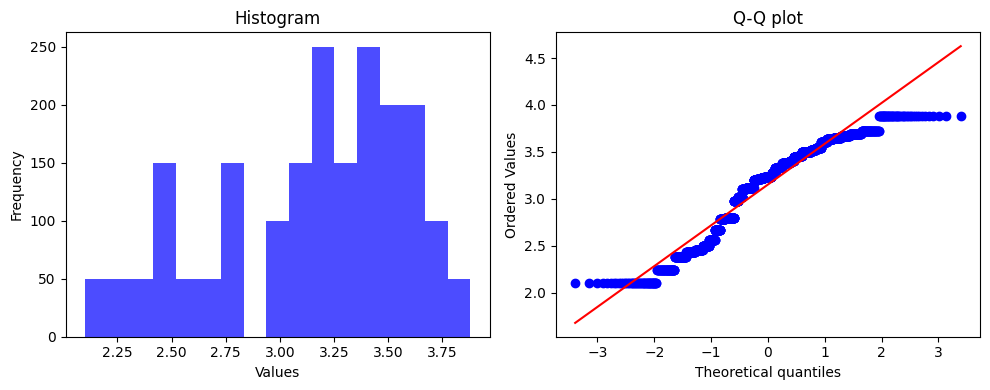

In [7]:
# Deciding which scaling method to use
plt.figure(figsize=(10, 4))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(students['cgpa'], bins='auto', alpha=0.7, color='b')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram')

# Q-Q plot
plt.subplot(1, 2, 2)
stats.probplot(students['cgpa'], dist="norm", plot=plt)
plt.title('Q-Q plot')

plt.tight_layout()
plt.show()

In [8]:
# Shapiro-Wilk test
_, p_value = stats.shapiro(students['oopLabNum'])
alpha = 0.05  # Significance level

if p_value > alpha:
    print("Data is normally distributed (fail to reject H0)")
else:
    print("Data is not normally distributed (reject H0)")


Data is not normally distributed (reject H0)


In [9]:
# Shapiro-Wilk test
_, p_value = stats.shapiro(students['HTML'])
alpha = 0.05  # Significance level

if p_value > alpha:
    print("Data is normally distributed (fail to reject H0)")
else:
    print("Data is not normally distributed (reject H0)")

Data is not normally distributed (reject H0)


In [10]:
data= pd.DataFrame()
data[['cgpa']]=students[['cgpa']]*2.5
data[['algoNum', 'oopNum', 'oopLabNum','webNum','webLabNum','dbNum','dbLabNum','dsaNum','dsaLabNum','itcNum','pfNum','pfLabNum']]=students[['algoNum', 'oopNum', 'oopLabNum','webNum','webLabNum','dbNum','dbLabNum','dsaNum','dsaLabNum','itcNum','pfNum','pfLabNum']]/10
data[['JAVA','FLASK','GO','C++','PYTHON','ROR','MERN','JAVASCRIPT','HTML','CSS']]=students[['JAVA','FLASK','GO','C++','PYTHON','ROR','MERN','JAVASCRIPT','HTML','CSS']]
column_names=['cgpa','algoNum', 'oopNum', 'oopLabNum','webNum','webLabNum','dbNum','dbLabNum','dsaNum','dsaLabNum','itcNum','pfNum','pfLabNum','JAVA','FLASK','GO','C++','PYTHON','ROR','MERN','JAVASCRIPT','HTML','CSS']
data['averageRatingStudent'] = data[column_names].mean(axis=1)
data

,cgpa,algoNum,oopNum,oopLabNum,webNum,webLabNum,dbNum,dbLabNum,dsaNum,dsaLabNum,...,FLASK,GO,C++,PYTHON,ROR,MERN,JAVASCRIPT,HTML,CSS,averageRatingStudent
0,7.0,8.0,5.0,7.0,6.8,7.2,7.0,7.0,5.8,7.0,...,0,0,8,5,0,5,7,7,8,5.7
1,7.0,8.0,5.0,7.0,6.8,7.2,7.0,7.0,5.8,7.0,...,0,0,8,5,0,5,7,7,8,5.7
2,7.0,8.0,5.0,7.0,6.8,7.2,7.0,7.0,5.8,7.0,...,0,0,8,5,0,5,7,7,8,5.7
3,7.0,8.0,5.0,7.0,6.8,7.2,7.0,7.0,5.8,7.0,...,0,0,8,5,0,5,7,7,8,5.7
4,7.0,8.0,5.0,7.0,6.8,7.2,7.0,7.0,5.8,7.0,...,0,0,8,5,0,5,7,7,8,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,5.9,6.4,6.7,6.3,5.4,5.8,7.5,6.2,6.1,6.4,...,5,0,5,5,0,0,0,7,5,4.7
1996,5.9,6.4,6.7,6.3,5.4,5.8,7.5,6.2,6.1,6.4,...,5,0,5,5,0,0,0,7,5,4.7
1997,5.9,6.4,6.7,6.3,5.4,5.8,7.5,6.2,6.1,6.4,...,5,0,5,5,0,0,0,7,5,4.7
1998,5.9,6.4,6.7,6.3,5.4,5.8,7.5,6.2,6.1,6.4,...,5,0,5,5,0,0,0,7,5,4.7


In [11]:
dataTest= pd.DataFrame()
dataTest[['cgpa']]=studentsTest[['cgpa']]*2.5
dataTest[['algoNum', 'oopNum', 'oopLabNum','webNum','webLabNum','dbNum','dbLabNum','dsaNum','dsaLabNum','itcNum','pfNum','pfLabNum']]=studentsTest[['algoNum', 'oopNum', 'oopLabNum','webNum','webLabNum','dbNum','dbLabNum','dsaNum','dsaLabNum','itcNum','pfNum','pfLabNum']]/10
dataTest[['JAVA','FLASK','GO','C++','PYTHON','ROR','MERN','JAVASCRIPT','HTML','CSS']]=studentsTest[['JAVA','FLASK','GO','C++','PYTHON','ROR','MERN','JAVASCRIPT','HTML','CSS']]
column_namesTest=['cgpa','algoNum', 'oopNum', 'oopLabNum','webNum','webLabNum','dbNum','dbLabNum','dsaNum','dsaLabNum','itcNum','pfNum','pfLabNum','JAVA','FLASK','GO','C++','PYTHON','ROR','MERN','JAVASCRIPT','HTML','CSS']
dataTest['averageRatingStudent'] = dataTest[column_namesTest].mean(axis=1)
dataTest

,cgpa,algoNum,oopNum,oopLabNum,webNum,webLabNum,dbNum,dbLabNum,dsaNum,dsaLabNum,...,FLASK,GO,C++,PYTHON,ROR,MERN,JAVASCRIPT,HTML,CSS,averageRatingStudent
0,7.5,7.0,9.2,8.2,7.8,7.6,7.1,7.2,6.6,6.2,...,7,0,7,6,0,1,3,7,6,5.8
1,7.5,7.0,9.2,8.2,7.8,7.6,7.1,7.2,6.6,6.2,...,7,0,7,6,0,1,3,7,6,5.8
2,7.5,7.0,9.2,8.2,7.8,7.6,7.1,7.2,6.6,6.2,...,7,0,7,6,0,1,3,7,6,5.8
3,7.5,7.0,9.2,8.2,7.8,7.6,7.1,7.2,6.6,6.2,...,7,0,7,6,0,1,3,7,6,5.8
4,7.5,7.0,9.2,8.2,7.8,7.6,7.1,7.2,6.6,6.2,...,7,0,7,6,0,1,3,7,6,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,9.0,8.2,8.3,8.7,8.7,8.2,7.6,8.5,7.2,6.8,...,0,0,8,7,0,6,7,9,8,6.9
496,9.0,8.2,8.3,8.7,8.7,8.2,7.6,8.5,7.2,6.8,...,0,0,8,7,0,6,7,9,8,6.9
497,9.0,8.2,8.3,8.7,8.7,8.2,7.6,8.5,7.2,6.8,...,0,0,8,7,0,6,7,9,8,6.9
498,9.0,8.2,8.3,8.7,8.7,8.2,7.6,8.5,7.2,6.8,...,0,0,8,7,0,6,7,9,8,6.9


In [12]:
#As Data is not Normally Distributed I'll use MinMaxScaler()
scalerStudent = MinMaxScaler()
scalerStudent.fit(data)
dataScaled=scalerStudent.transform(data)
dataScaled

array([[0.39325843, 0.85106383, 0.        , ..., 0.5       , 1.        ,
        0.49601064],
       [0.39325843, 0.85106383, 0.        , ..., 0.5       , 1.        ,
        0.49601064],
       [0.39325843, 0.85106383, 0.        , ..., 0.5       , 1.        ,
        0.49601064],
       ...,
       [0.15730337, 0.68085106, 0.38636364, ..., 0.5       , 0.625     ,
        0.1974734 ],
       [0.15730337, 0.68085106, 0.38636364, ..., 0.5       , 0.625     ,
        0.1974734 ],
       [0.15730337, 0.68085106, 0.38636364, ..., 0.5       , 0.625     ,
        0.1974734 ]])

In [13]:
#As Data is not Normally Distributed I'll use MinMaxScaler()
dataScaledTest = scalerStudent.transform(dataTest)
dataScaledTest

array([[0.50561798, 0.74468085, 0.95454545, ..., 0.5       , 0.75      ,
        0.53191489],
       [0.50561798, 0.74468085, 0.95454545, ..., 0.5       , 0.75      ,
        0.53191489],
       [0.50561798, 0.74468085, 0.95454545, ..., 0.5       , 0.75      ,
        0.53191489],
       ...,
       [0.84269663, 0.87234043, 0.75      , ..., 1.        , 1.        ,
        0.87101064],
       [0.84269663, 0.87234043, 0.75      , ..., 1.        , 1.        ,
        0.87101064],
       [0.84269663, 0.87234043, 0.75      , ..., 1.        , 1.        ,
        0.87101064]])

In [14]:
dataNormalized = pd.DataFrame(dataScaled, columns=['averageRatingStudent','cgpa','algoNum', 'oopNum', 'oopLabNum','webNum','webLabNum','dbNum','dbLabNum','dsaNum','dsaLabNum','itcNum','pfNum','pfLabNum','JAVA','FLASK','GO','C++','PYTHON','ROR','MERN','JAVASCRIPT','HTML','CSS'])
dataNormalized

,averageRatingStudent,cgpa,algoNum,oopNum,oopLabNum,webNum,webLabNum,dbNum,dbLabNum,dsaNum,...,JAVA,FLASK,GO,C++,PYTHON,ROR,MERN,JAVASCRIPT,HTML,CSS
0,0.4,0.9,0.0,0.3,3.8e-01,0.5,0.4,0.5,0.2,0.6,...,0.0,0.0,1.0,0.6,0.0,0.6,0.8,0.5,1.0,0.5
1,0.4,0.9,0.0,0.3,3.8e-01,0.5,0.4,0.5,0.2,0.6,...,0.0,0.0,1.0,0.6,0.0,0.6,0.8,0.5,1.0,0.5
2,0.4,0.9,0.0,0.3,3.8e-01,0.5,0.4,0.5,0.2,0.6,...,0.0,0.0,1.0,0.6,0.0,0.6,0.8,0.5,1.0,0.5
3,0.4,0.9,0.0,0.3,3.8e-01,0.5,0.4,0.5,0.2,0.6,...,0.0,0.0,1.0,0.6,0.0,0.6,0.8,0.5,1.0,0.5
4,0.4,0.9,0.0,0.3,3.8e-01,0.5,0.4,0.5,0.2,0.6,...,0.0,0.0,1.0,0.6,0.0,0.6,0.8,0.5,1.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.2,0.7,0.4,0.1,8.5e-02,0.1,0.5,0.3,0.3,0.4,...,0.6,0.0,0.4,0.6,0.0,0.0,0.0,0.5,0.6,0.2
1996,0.2,0.7,0.4,0.1,8.5e-02,0.1,0.5,0.3,0.3,0.4,...,0.6,0.0,0.4,0.6,0.0,0.0,0.0,0.5,0.6,0.2
1997,0.2,0.7,0.4,0.1,8.5e-02,0.1,0.5,0.3,0.3,0.4,...,0.6,0.0,0.4,0.6,0.0,0.0,0.0,0.5,0.6,0.2
1998,0.2,0.7,0.4,0.1,8.5e-02,0.1,0.5,0.3,0.3,0.4,...,0.6,0.0,0.4,0.6,0.0,0.0,0.0,0.5,0.6,0.2


In [15]:
dataNormalizedTest = pd.DataFrame(dataScaledTest, columns=['averageRatingStudent','cgpa','algoNum', 'oopNum', 'oopLabNum','webNum','webLabNum','dbNum','dbLabNum','dsaNum','dsaLabNum','itcNum','pfNum','pfLabNum','JAVA','FLASK','GO','C++','PYTHON','ROR','MERN','JAVASCRIPT','HTML','CSS'])
dataNormalizedTest

,averageRatingStudent,cgpa,algoNum,oopNum,oopLabNum,webNum,webLabNum,dbNum,dbLabNum,dsaNum,...,JAVA,FLASK,GO,C++,PYTHON,ROR,MERN,JAVASCRIPT,HTML,CSS
0,0.5,0.7,1.0,0.7,0.6,0.6,0.5,0.5,0.5,0.3,...,0.9,0.0,0.8,0.7,0.0,0.1,0.3,0.5,0.8,0.5
1,0.5,0.7,1.0,0.7,0.6,0.6,0.5,0.5,0.5,0.3,...,0.9,0.0,0.8,0.7,0.0,0.1,0.3,0.5,0.8,0.5
2,0.5,0.7,1.0,0.7,0.6,0.6,0.5,0.5,0.5,0.3,...,0.9,0.0,0.8,0.7,0.0,0.1,0.3,0.5,0.8,0.5
3,0.5,0.7,1.0,0.7,0.6,0.6,0.5,0.5,0.5,0.3,...,0.9,0.0,0.8,0.7,0.0,0.1,0.3,0.5,0.8,0.5
4,0.5,0.7,1.0,0.7,0.6,0.6,0.5,0.5,0.5,0.3,...,0.9,0.0,0.8,0.7,0.0,0.1,0.3,0.5,0.8,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.8,0.9,0.8,0.8,0.8,0.8,0.6,0.8,0.6,0.5,...,0.0,0.0,1.0,0.8,0.0,0.8,0.8,1.0,1.0,0.9
496,0.8,0.9,0.8,0.8,0.8,0.8,0.6,0.8,0.6,0.5,...,0.0,0.0,1.0,0.8,0.0,0.8,0.8,1.0,1.0,0.9
497,0.8,0.9,0.8,0.8,0.8,0.8,0.6,0.8,0.6,0.5,...,0.0,0.0,1.0,0.8,0.0,0.8,0.8,1.0,1.0,0.9
498,0.8,0.9,0.8,0.8,0.8,0.8,0.6,0.8,0.6,0.5,...,0.0,0.0,1.0,0.8,0.0,0.8,0.8,1.0,1.0,0.9


In [16]:
#scaler = MinMaxScaler()
#dataScaled_skills = scaler.fit_transform(students_skills[['JAVA','FLASK','DJANGO','GO','C++','PYTHON','ROR','.NET','C#','MERN','JAVASCRIPT']])
#dataScaled_skills

In [17]:
#dataNormalized_skills = pd.DataFrame(dataScaled_skills, columns=['JAVA','FLASK','DJANGO','GO','C++','PYTHON','ROR','.NET','C#','MERN','JAVASCRIPT'])
#dataNormalized_skills

In [18]:
#data=pd.concat([dataNormalized_Marks, dataNormalized_skills], axis=1)
#data

In [19]:
jobs=pd.read_excel('/content/FinalJobs.xlsx')
jobsTest=pd.read_excel('/content/testJobs.xlsx')

In [20]:
jobs

,Job,HTML,CSS,JAVA,C++,PYTHON,FLASK,JAVASCRIPT,GO,MERN,ROR
0,JAVASCRIPT,5,5,3,4,4,4,10,2,5,4
1,FLASK,4,3,2,4,8,8,1,2,4,4
2,JAVASCRIPT,5,5,3,4,4,4,9,2,5,4
3,FLASK,4,3,2,4,9,9,1,2,4,4
4,ROR,5,4,2,2,5,2,7,2,8,9
...,...,...,...,...,...,...,...,...,...,...,...
1995,MERN,5,5,2,3,2,2,7,1,10,4
1996,C++,2,2,9,9,3,2,0,3,1,1
1997,C++,2,2,8,8,3,2,0,3,1,1
1998,MERN,5,5,2,3,2,2,7,1,10,4


In [21]:
scalerJobs = MinMaxScaler()
scalerJobs.fit(jobs[['JAVA','FLASK','GO','C++','PYTHON','ROR','MERN','JAVASCRIPT','HTML','CSS']])
dataScaled_jobs = scalerJobs.fit_transform(jobs[['JAVA','FLASK','GO','C++','PYTHON','ROR','MERN','JAVASCRIPT','HTML','CSS']])
dataScaled_jobs

array([[0.125     , 0.28571429, 0.2       , ..., 1.        , 0.375     ,
        0.42857143],
       [0.        , 0.85714286, 0.2       , ..., 0.1       , 0.25      ,
        0.14285714],
       [0.125     , 0.28571429, 0.2       , ..., 0.9       , 0.375     ,
        0.42857143],
       ...,
       [0.75      , 0.        , 0.3       , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.1       , ..., 0.7       , 0.375     ,
        0.42857143],
       [0.125     , 0.        , 0.4       , ..., 0.1       , 0.        ,
        0.        ]])

In [22]:
dataScaled_jobsTest = scalerJobs.transform(jobsTest[['JAVA','FLASK','GO','C++','PYTHON','ROR','MERN','JAVASCRIPT','HTML','CSS']])
dataScaled_jobsTest

array([[0.125     , 0.28571429, 0.2       , ..., 1.        , 0.375     ,
        0.42857143],
       [0.        , 0.85714286, 0.2       , ..., 0.1       , 0.25      ,
        0.14285714],
       [0.125     , 0.28571429, 0.2       , ..., 0.9       , 0.375     ,
        0.42857143],
       ...,
       [0.75      , 0.        , 0.3       , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.1       , ..., 0.7       , 0.375     ,
        0.42857143],
       [0.125     , 0.        , 0.4       , ..., 0.1       , 0.        ,
        0.        ]])

In [23]:
dataNormalized_jobs = pd.DataFrame(dataScaled_jobs, columns=['JAVA','FLASK','GO','C++','PYTHON','ROR','MERN','JAVASCRIPT','HTML','CSS'])
dataNormalized_jobs

,JAVA,FLASK,GO,C++,PYTHON,ROR,MERN,JAVASCRIPT,HTML,CSS
0,0.1,0.3,0.2,0.3,0.2,0.3,0.4,1.0,0.4,0.4
1,0.0,0.9,0.2,0.3,0.8,0.3,0.3,0.1,0.2,0.1
2,0.1,0.3,0.2,0.3,0.2,0.3,0.4,0.9,0.4,0.4
3,0.0,1.0,0.2,0.3,0.9,0.3,0.3,0.1,0.2,0.1
4,0.0,0.0,0.2,0.0,0.4,0.9,0.8,0.7,0.4,0.3
...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.1,0.1,0.0,0.3,1.0,0.7,0.4,0.4
1996,0.9,0.0,0.3,1.0,0.1,0.0,0.0,0.0,0.0,0.0
1997,0.8,0.0,0.3,0.9,0.1,0.0,0.0,0.0,0.0,0.0
1998,0.0,0.0,0.1,0.1,0.0,0.3,1.0,0.7,0.4,0.4


In [24]:
dataNormalized_jobsTest = pd.DataFrame(dataScaled_jobsTest, columns=['JAVA','FLASK','GO','C++','PYTHON','ROR','MERN','JAVASCRIPT','HTML','CSS'])
dataNormalized_jobsTest

,JAVA,FLASK,GO,C++,PYTHON,ROR,MERN,JAVASCRIPT,HTML,CSS
0,0.1,0.3,0.2,0.3,0.2,0.3,0.4,1.0,0.4,0.4
1,0.0,0.9,0.2,0.3,0.8,0.3,0.3,0.1,0.2,0.1
2,0.1,0.3,0.2,0.3,0.2,0.3,0.4,0.9,0.4,0.4
3,0.0,1.0,0.2,0.3,0.9,0.3,0.3,0.1,0.2,0.1
4,0.0,0.0,0.2,0.0,0.4,0.9,0.8,0.7,0.4,0.3
...,...,...,...,...,...,...,...,...,...,...
495,0.0,0.0,0.1,0.1,0.0,0.3,1.0,0.7,0.4,0.4
496,0.9,0.0,0.3,1.0,0.1,0.0,0.0,0.0,0.0,0.0
497,0.8,0.0,0.3,0.9,0.1,0.0,0.0,0.0,0.0,0.0
498,0.0,0.0,0.1,0.1,0.0,0.3,1.0,0.7,0.4,0.4


In [25]:
targetDataSet= pd.read_excel('/content/targetData.xlsx')
targetDataSetTest=pd.read_excel('/content/testTarget.xlsx')
scalerTest = MinMaxScaler()
scalerTest.fit(targetDataSet)
targetDataSetArr= scalerTest.transform(targetDataSet)
targetDataSetArrTest= scalerTest.transform(targetDataSetTest)
targetDataSetArr

array([[0.57217872],
       [0.43281689],
       [0.55843882],
       ...,
       [0.14033026],
       [0.15210732],
       [0.1697729 ]])

In [26]:
num_outputs = 16
tf.random.set_seed(1)


jobs_NN = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(num_outputs, activation='relu',
    kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2)])
students_NN= tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(num_outputs, activation='relu',
    kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2)
    ])


# create the jobs input and point to the base network
input_jobs = tf.keras.layers.Input(shape=(len(dataNormalized_jobs.columns)))
vm = jobs_NN(input_jobs)
vm = tf.linalg.l2_normalize(vm, axis=1)

# create the students input and point to the base network
input_students = tf.keras.layers.Input(shape=(len(dataNormalized.columns)))
vu = students_NN(input_students)
vu = tf.linalg.l2_normalize(vu, axis=1)

# compute the dot product of the two vectors vu and vm
output = tf.keras.layers.Dot(axes=1)([vm, vu])

# specify the inputs and output of the model
model = Model([input_jobs,input_students], output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 24)]         0           []                               
                                                                                                  
 sequential (Sequential)        (None, 16)           3376        ['input_1[0][0]']                
                                                                                                  
 sequential_1 (Sequential)      (None, 16)           4272        ['input_2[0][0]']                
                                                                                              

In [27]:
tf.random.set_seed(1)
cost_fn = tf.keras.losses.MeanSquaredError()
initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(optimizer=opt,
              loss=cost_fn)

In [28]:
tf.random.set_seed(1)
history=model.fit([dataScaled_jobs,dataScaled],targetDataSetArr,epochs=50)

Epoch 1/50
63/63 [==============================] - 3s 4ms/step - loss: 0.4360
Epoch 2/50
63/63 [==============================] - 0s 3ms/step - loss: 0.0902
Epoch 3/50
63/63 [==============================] - 0s 3ms/step - loss: 0.0294
Epoch 4/50
63/63 [==============================] - 0s 3ms/step - loss: 0.0205
Epoch 5/50
63/63 [==============================] - 0s 3ms/step - loss: 0.0188
Epoch 6/50
63/63 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 7/50
63/63 [==============================] - 0s 4ms/step - loss: 0.0173
Epoch 8/50
63/63 [==============================] - 0s 4ms/step - loss: 0.0159
Epoch 9/50
63/63 [==============================] - 0s 3ms/step - loss: 0.0153
Epoch 10/50
63/63 [==============================] - 0s 3ms/step - loss: 0.0154
Epoch 11/50
63/63 [==============================] - 0s 4ms/step - loss: 0.0142
Epoch 12/50
63/63 [==============================] - 0s 3ms/step - loss: 0.0134
Epoch 13/50
63/63 [==============================

In [29]:
model.evaluate([dataScaled_jobsTest,dataScaledTest],targetDataSetArrTest)

16/16 [==============================] - 0s 2ms/step - loss: 0.0294


0.02936163917183876

In [30]:
prediction= model.predict([dataScaled_jobsTest,dataScaledTest])

prediction[0]-targetDataSetArrTest[0]


16/16 [==============================] - 0s 2ms/step


array([-0.09806116])

In [31]:
print(prediction[0])
print(targetDataSetArrTest[0])

[0.4647596]
[0.56282075]


In [44]:
# Set a threshold for the maximum allowable difference
threshold = 0.35

# Compare the values and create a new array
comparisonArray = np.where(abs(targetDataSetArrTest - prediction) <= threshold,1,0)
count0s = np.count_nonzero(comparisonArray== 0)
count1s = np.count_nonzero(comparisonArray == 1)
Accuracy= (count1s/len(prediction))*100
print(f"Accuracy= {Accuracy} %")

Accuracy= 95.8 %


In [45]:
np.squeeze(prediction).shape

(500,)

In [46]:
from scipy.stats import pearsonr
correlation, _ = pearsonr(np.squeeze(prediction), np.squeeze(targetDataSetArrTest))
correlation

0.9384810634229271

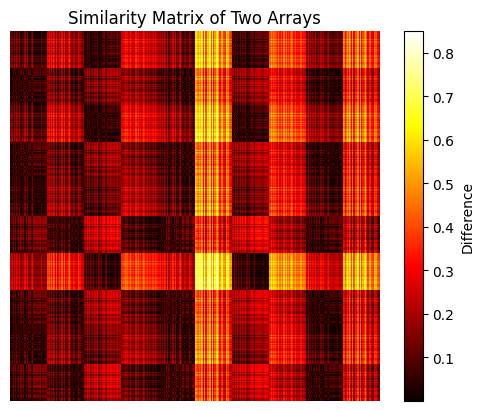

In [47]:
# Compute similarity matrix
import matplotlib.pyplot as plt
similarity_matrix = np.abs(np.subtract.outer(np.squeeze(prediction), np.squeeze(targetDataSetArrTest)))

# Plotting the similarity matrix
plt.imshow(similarity_matrix, cmap='hot', interpolation='nearest')
plt.colorbar(label='Difference')
plt.axis('off')
plt.xlabel('Array 2')
plt.ylabel('Array 1')
plt.title('Similarity Matrix of Two Arrays')
plt.show()

In [48]:
#Recommendation for a jon
job=dataNormalized_jobs.iloc[0].values
jobTotalStudents= np.tile(job,(len(dataScaled),1))
jobTotalStudents

array([[0.125     , 0.28571429, 0.2       , ..., 1.        , 0.375     ,
        0.42857143],
       [0.125     , 0.28571429, 0.2       , ..., 1.        , 0.375     ,
        0.42857143],
       [0.125     , 0.28571429, 0.2       , ..., 1.        , 0.375     ,
        0.42857143],
       ...,
       [0.125     , 0.28571429, 0.2       , ..., 1.        , 0.375     ,
        0.42857143],
       [0.125     , 0.28571429, 0.2       , ..., 1.        , 0.375     ,
        0.42857143],
       [0.125     , 0.28571429, 0.2       , ..., 1.        , 0.375     ,
        0.42857143]])

In [49]:
jobsTest.iloc[0]

Job           JAVASCRIPT
HTML                   5
CSS                    5
JAVA                   3
C++                    4
PYTHON                 4
FLASK                  4
JAVASCRIPT            10
GO                     2
MERN                   5
ROR                    4
Name: 0, dtype: object

In [50]:
rec=model.predict([jobTotalStudents,dataScaled])

63/63 [==============================] - 0s 5ms/step


In [51]:
rec

array([[0.5039972 ],
       [0.5039972 ],
       [0.5039972 ],
       ...,
       [0.23409663],
       [0.23409663],
       [0.23409663]], dtype=float32)

In [52]:
rec.argmax()

1700

In [53]:
    sorted_index = np.argsort(-rec,axis=0).reshape(-1).tolist()  #negate to get largest rating first
    sorted_ypu   = rec[sorted_index]
    sorted_items = dataScaled[sorted_index]
    sortedStudents=students.iloc[sorted_index]
    sortedSts= sortedStudents.drop_duplicates(subset='rollNo')

In [56]:
sortedSts

,id,rollNo,name,semester,cgpa,webLabNum,webNum,algoNum,dbLabNum,dbNum,...,C++,JAVA,PYTHON,HTML,CSS,FLASK,JAVASCRIPT,GO,MERN,ROR
1700,45,Bsef20a047,Ahmad Abdul Rehman,7,3.9,92,97,86,76,81,...,8,5,8,5,3,5,0,8,0,9
403,19,bcsf19a014,Arsal Hussain,7,3.5,85,80,90,91,76,...,8,6,7,8,7,0,7,0,6,0
334,17,BSEF20M003,Basit Shafiq,7,3.6,89,92,78,73,82,...,8,8,7,8,6,6,6,5,5,5
1904,49,Bsef20a051,Rafay Qayyum,7,3.6,80,89,90,86,95,...,8,0,9,7,7,8,0,0,8,0
1461,40,Bsef20a042,Abdul Wahab Bin Tahir Iqbal,7,3.7,89,92,85,86,95,...,8,7,8,7,5,7,0,0,0,8
825,27,Bsef20a029,Gonash Bin Javed,7,3.7,85,80,94,91,83,...,8,0,7,8,5,0,7,0,5,0
1375,38,Bsef20a040,Abdullah Salman,7,3.6,80,89,90,86,95,...,8,7,6,7,7,0,5,0,0,8
450,20,bcsf19a043,Shahbaz,7,3.5,91,88,78,86,85,...,7,5,7,8,6,0,7,0,6,0
750,26,Bsef20a028,Abubakar Sohail,7,3.7,80,89,80,86,95,...,8,0,8,9,7,8,0,0,0,0
299,16,BSEF20M021,Muhammad Abdullah,7,3.5,82,83,81,61,67,...,8,0,9,9,7,8,0,6,0,0


**Things to DO**
- Change Target Dataset into 0 and 1.
- Change Algorithm Creating Jobs DataSet.
- Change Algorithm Creating Target DataSet.